### Autor: Pablo Veloz M.

## Desafío - Clasificación desde Machine Learning

* Descripción: En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:
    * default : Variable binaria. Registra si el cliente entró en morosidad o no.
    * income : Ingreso promedio declarado por el cliente.
    * balance : Total de saldo en la cuenta de crédito.
    * student : Variable binaria. Registra si el cliente es estudiante o no.

### Desafío 1: Preparación del ambiente de trabajo
* Importe los módulos básicos para el análisis de datos
* Importe seaborn .
* Importe statsmodels
* Importe LogisticRegression , train_test_split , StandardScaler ,
* classification_report y roc_curve de sklearn

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.patches as mpatches
#import lec4_graphs as gfx
import ipywidgets as widgets 
from ipywidgets import interact, interact_manual
from IPython.display import display
from ipywidgets import Checkbox
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

df = pd.read_csv('default_credit.csv', encoding = 'ISO-8859-1',sep=',', engine='python')

In [3]:
df=df.drop("index",axis=1)
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


### Desafío 2: Análisis exploratorio
* Explore las principales relaciones entre las variables. Utilizando los métodos boxplot y lmplot de seaborn implemente los siguientes gráficos.
    * Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.
    * Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.
    * Un boxplot del balance total de las cuentas, segmentado por el status de default.
    * Un boxplot del ingreso total de cada cliente, segmentado por el status de default.
    * Un diagrama de dispersión entre balance e income , segmentado por el status de estudiante.
    * Un diagrama de dispersión entre balance e income , segmentado por el status de default.
* Comente brevemente sobre los principales patrones de comportamiento.

__tip: Puede utilizar el argumento hue en lmplot para identificar las observaciones por
status.__

In [4]:
def students(dataframe):
    var=["balance","income"]
    fig = plt.figure()
    plt.subplots_adjust(wspace=0.4,right = 1.5)
    
    for i,n in enumerate(var):
        plt.subplot(1,2,i+1)
        sns.boxplot(dataframe["student"],df[n])
        plt.title(n+" v/s"+" student")
        sns.set_palette("bright")
        #sns.set_palette("husl")
        #plt.ylabel(" ")
        #plt.xlabel(" ")
        #plt.xticks(rotation=45,ha="right")

* __Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.__
* __Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.__

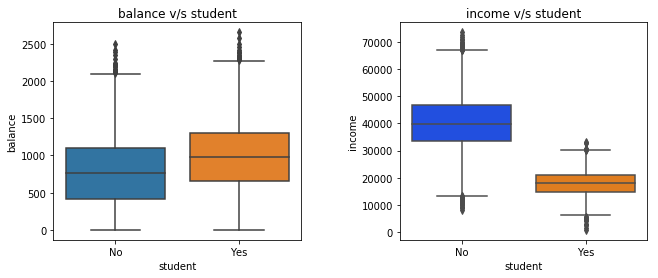

In [5]:
students(df)

__* Se observa:__
    * Si la persona es estudiante entonces tiene mayor saldo en la cuenta
    * En cambio, si la persona es estudiante el ingreso es menor.

* __Un boxplot del balance total de las cuentas, segmentado por el status de default.__
* __Un boxplot del ingreso total de cada cliente, segmentado por el status de default.__

In [6]:
def defaults(dataframe):
    var=["balance","income"]
    fig = plt.figure()
    plt.subplots_adjust(wspace=0.4,right = 1.5)
    for i,n in enumerate(var):
        plt.subplot(1,2,i+1)
        sns.boxplot(dataframe["default"],df[n])
        plt.title(n+" v/s"+" default")
        sns.set_palette("bright")
        #plt.ylabel(" ")
        #plt.xlabel(" ")
        #plt.xticks(rotation=45,ha="right")

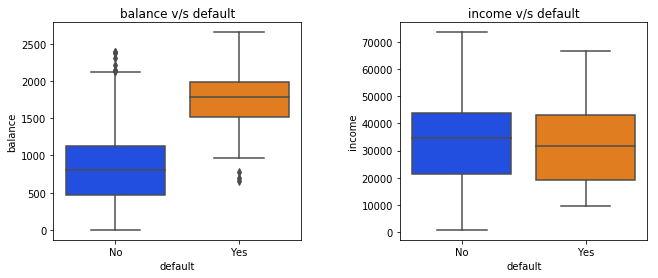

In [7]:
defaults(df)

__Se observa:__
* Si la persona presenta morosidad, también tiene mayor saldo en su cuenta
* Levemente para las personas que no tienen morosidad, tienen menores ingreso.

* Un diagrama de dispersión entre balance e income , segmentado por el status de estudiante.

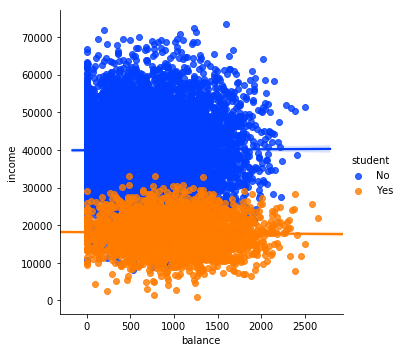

In [8]:
sns.lmplot("balance","income",df,hue='student', legend=True)
#plt.legend(loc='upper right')

* Un diagrama de dispersión entre balance e income , segmentado por el status de default.

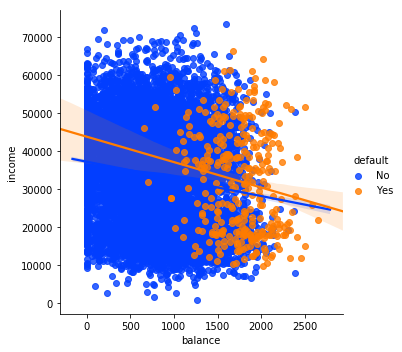

In [9]:
sns.lmplot("balance","income",df, hue='default', legend=True)

#plt.legend(loc='upper right')

### Desafío 3: Modelación econométrica
* Recodifique las variables student y default para que adquieran atributos numéricos.Implemente el siguiente modelo econométrico:
    
    $\log\left( \frac{Pr(default=1)}{1-Pr(default=1)} \right) = \beta_{0}+\beta_{1} \cdot balance+\beta_{2} \cdot income+\beta_{3} \cdot student $
    
    
    
* A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.

In [67]:
df["flag_default"]= np.where(df["default"]=="Yes",1,0)   
df["flag_student"]= np.where(df["student"]=="Yes",1,0)

In [68]:
def concise_summary(mod, print_fit=True):
    #guardamos los parámetros asociados a estadísticas de ajuste
    fit = pd.DataFrame({'Statistics': mod.summary2().tables[0][2][2:],
    'Value': mod.summary2().tables[0][3][2:]})
    # guardamos los parámetros estimados por cada regresor.
    estimates = pd.DataFrame(mod.summary2().tables[1].loc[:, 'Coef.': 'Std.Err.'])
    # imprimir fit es opcional
    if print_fit is True:
        print("\nGoodness of Fit statistics\n", fit)
        print("\nPoint Estimates\n\n", estimates)
    # solicitemos las características del modelo

In [70]:
m1_logit = smf.logit('flag_default ~ flag_student+income+balance', df).fit()
m1_logit.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           flag_default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Wed, 31 Jul 2019   Pseudo R-squ.:                  0.4619
Time:                        20:18:49   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                3.257e-292
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -10.8690      0.492    -22.079      0.000     -11.834      -9.904
flag_student    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
income        3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
balance          0.0057      0.000     24.737      0.000       0.005       0.006
================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [71]:
m1_logit.pvalues

Intercept       4.995499e-108
flag_student     6.189022e-03
income           7.115254e-01
balance         4.331521e-135
dtype: float64

In [73]:
m2_logit = smf.logit('flag_default ~ flag_student+balance', df).fit()
m2_logit.summary()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           flag_default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 31 Jul 2019   Pseudo R-squ.:                  0.4619
Time:                        20:19:54   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                1.189e-293
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -10.7495      0.369    -29.115      0.000     -11.473     -10.026
flag_student    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
balance          0.0057      0.000     24.748      0.000       0.005       0.006
================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Desafío 4: Entrenar
* A partir del modelo depurado, genere un modelo predictivo con las siguientes características: Estandarize la matriz de atributos.
* Genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.
* Implemente el modelo sin alterar los hiperparámetros.
* Genere la predicción de las clases y de la probabilidad.
* Reporte las métricas de precision, recall y f1 para ambas clases.
* Grafique la curva Receiver Operator Characteristic.
* En base a los pasos, comente sobre el desempeño predictivo del modelo.

In [82]:
#flag_student+balance
df.dropna(subset=["default","flag_student","balance"],inplace=True)
y_vec=df["flag_default"]
X_mat=df.loc[:,["flag_student","balance"]].dropna()


X_train,X_test,y_train,y_test=train_test_split(X_mat,y_vec,test_size=0.33,random_state=1612)
std_scaler=StandardScaler().fit(X_train)
data_preproc_Xtrain=std_scaler.transform(X_train)
data_preproc_Xtest=std_scaler.transform(X_test)

logistic_model=LogisticRegression().fit(data_preproc_Xtrain,y_train)
y_predict=logistic_model.predict(data_preproc_Xtest)

print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3200
           1       0.76      0.28      0.41       100

   micro avg       0.98      0.98      0.98      3300
   macro avg       0.87      0.64      0.70      3300
weighted avg       0.97      0.98      0.97      3300



C:\Users\proveloz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\proveloz\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\proveloz\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


### Grafique la curva Receiver Operator Characteristic.

probabilidades:  [0.00261416 0.00041937 0.037435   ... 0.02899828 0.00055202 0.12205873]


Text(0.5, 0, 'Falsos posivitos')

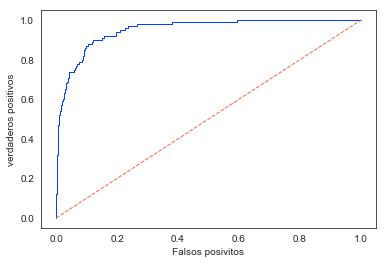

In [86]:
yhat_pr= logistic_model.predict_proba(data_preproc_Xtest)[:,1]
print("probabilidades: ",yhat_pr)
false_positive,true_positive,threshold = roc_curve(y_test,yhat_pr)
plt.plot(false_positive,true_positive,lw=1)
plt.plot([0,1],linestyle="--",lw=1,color="tomato")
plt.ylabel("verdaderos positivos")
plt.xlabel("Falsos posivitos")

In [94]:
auc=roc_auc_score(y_test,yhat_pr)
print("AUC: ",auc)
print("Desempeño del modelo: ",auc-0.5)

AUC:  0.952315625
Desempeño del modelo:  0.452315625


### Analisis
- __El modelo tiene un desempeño superior a 0.452 respecto a un modelo aleatorio cara,sello.__